In [2]:
import pandas as pd  # Import pandas for data handling

# Load the dataset
file_path = "/Users/pink_rat/Documents/Nat_Gas.csv"  # Path to the uploaded file
df = pd.read_csv(file_path)

# Display first few rows to inspect the structure
print("First few rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


First few rows of the dataset:
      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes
None

Summary statistics:
          Prices
count  48.000000
mean   11.207083
std     0.757897
min     9.840000
25%    10.650000
50%    11.300000
75%    11.625000
max    12.800000


In [4]:
# Convert "Dates" column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], format="%m/%d/%y")  # Adjust format if needed

# Set "Dates" as the index
df.set_index('Dates', inplace=True)

# Sort data to ensure chronological order
df = df.sort_index()

# Display first few rows after processing
print("Processed Data:")
print(df.head())


Processed Data:
            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# If missing values exist, interpolate them
if missing_values.sum() > 0:
    df['Prices'] = df['Prices'].interpolate(method='linear')
    print("\nMissing values handled using linear interpolation.")

# Display updated dataset summary
print("\nUpdated dataset after handling missing values:")
print(df.info())


Missing values in each column:
Prices    0
dtype: int64

Updated dataset after handling missing values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None


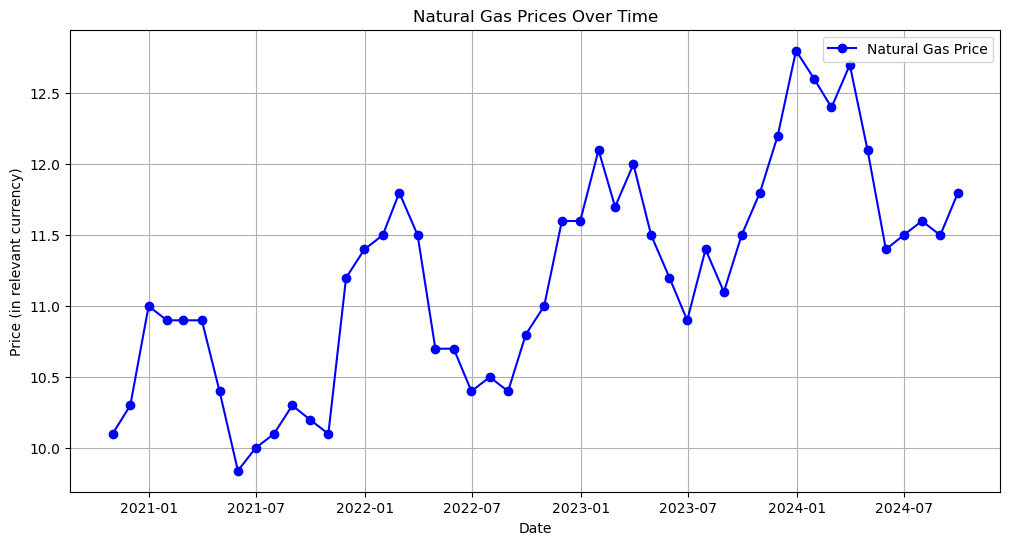

In [8]:
import matplotlib.pyplot as plt  

# Plot the natural gas prices over time
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(df.index, df['Prices'], marker='o', linestyle='-', color='b', label="Natural Gas Price")

# Formatting
plt.xlabel("Date")
plt.ylabel("Price (in relevant currency)")
plt.title("Natural Gas Prices Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


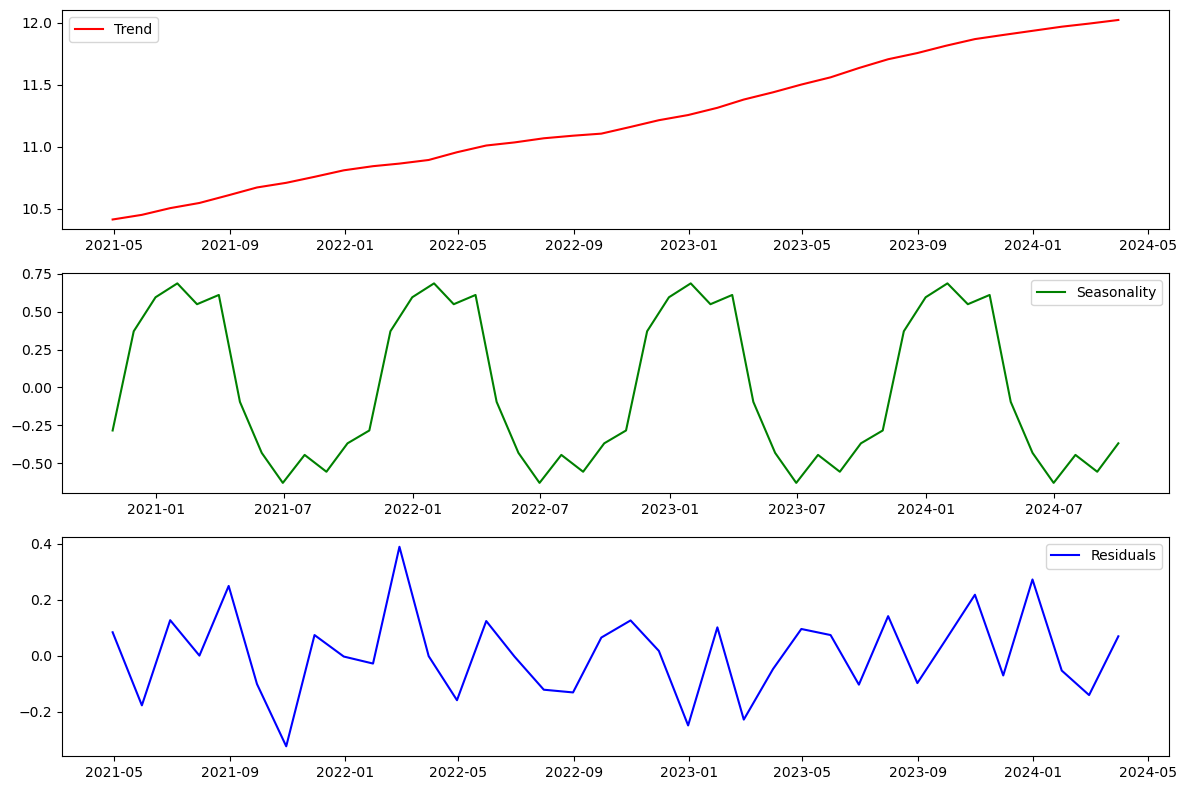

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose  

# Decompose the time series (additive model assumes independent effects)
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)  

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Trend component
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label="Trend", color='r')
plt.legend()

# Seasonal component
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label="Seasonality", color='g')
plt.legend()

# Residuals (noise)
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label="Residuals", color='b')
plt.legend()

plt.tight_layout()  
plt.show()


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  

# Fit the SARIMA model
model = SARIMAX(df['Prices'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
results = model.fit()

# Print model summary
print(results.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54046D-01    |proj g|=  3.48180D-01

At iterate    5    f=  2.66131D-02    |proj g|=  7.22259D-02

At iterate   10    f=  1.45726D-02    |proj g|=  3.76829D-02

At iterate   15    f=  1.35268D-02    |proj g|=  3.48171D-02

At iterate   20    f=  1.33678D-02    |proj g|=  7.83340D-03

At iterate   25    f=  1.33545D-02    |proj g|=  4.26822D-03

At iterate   30    f=  1.33523D-02    |proj g|=  6.57803D-03

At iterate   35    f=  1.33440D-02    |proj g|=  1.76824D-03

At iterate   40    f=  1.33436D-02    |proj g|=  1.46574D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

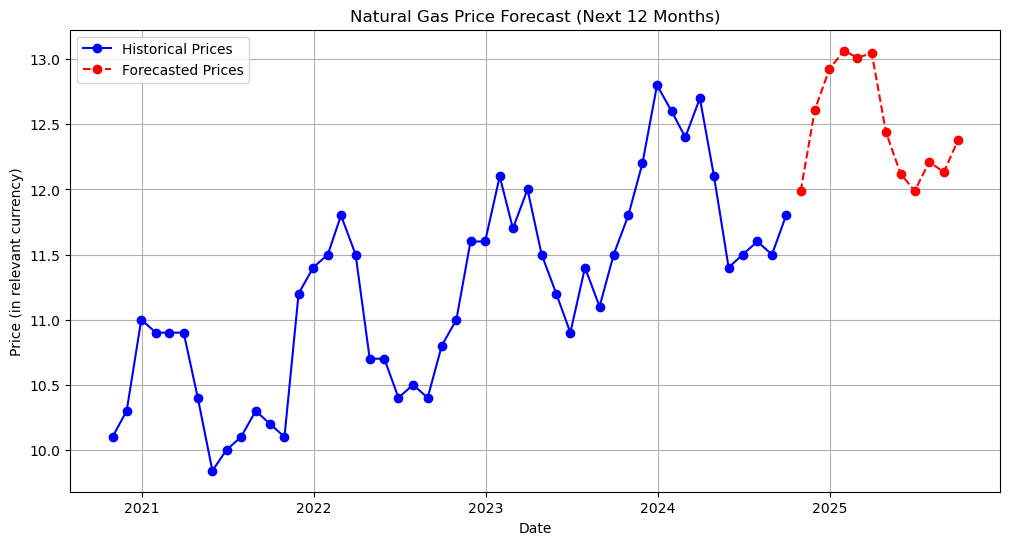

In [16]:
import pandas as pd  

# Forecast the next 12 months
future_steps = 12  
forecast_index = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='ME')[1:]  

# Get predicted values
forecast = results.get_forecast(steps=future_steps)
forecast_mean = forecast.predicted_mean  

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_index, 'Predicted Price': forecast_mean.values})  
forecast_df.set_index('Date', inplace=True)

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o', linestyle='-', color='b', label="Historical Prices")  
plt.plot(forecast_df.index, forecast_df['Predicted Price'], marker='o', linestyle='--', color='r', label="Forecasted Prices")  

# Formatting
plt.xlabel("Date")
plt.ylabel("Price (in relevant currency)")
plt.title("Natural Gas Price Forecast (Next 12 Months)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
